In [46]:
library(party)
library(randomForest)
library(caret)
library(tidyverse)
# library(tictoc)

In [47]:
df = read_csv('credit_train.csv')

Parsed with column specification:
cols(
  `Loan ID` = col_character(),
  `Customer ID` = col_character(),
  `Loan Status` = col_character(),
  `Current Loan Amount` = col_integer(),
  Term = col_character(),
  `Credit Score` = col_integer(),
  `Annual Income` = col_integer(),
  `Years in current job` = col_character(),
  `Home Ownership` = col_character(),
  Purpose = col_character(),
  `Monthly Debt` = col_double(),
  `Years of Credit History` = col_double(),
  `Months since last delinquent` = col_integer(),
  `Number of Open Accounts` = col_integer(),
  `Number of Credit Problems` = col_integer(),
  `Current Credit Balance` = col_integer(),
  `Maximum Open Credit` = col_integer(),
  Bankruptcies = col_integer(),
  `Tax Liens` = col_integer()
)


## Exploring the dataset with str() *
1. Gives you more information and overall sense of the data
2. Readr (a package where you call read_csv from) will type strings as char right away. 

In [48]:
str(df)
# Str() is a powerful function that gives a more complete overview of the the language

Classes 'tbl_df', 'tbl' and 'data.frame':	100514 obs. of  19 variables:
 $ Loan ID                     : chr  "14dd8831-6af5-400b-83ec-68e61888a048" "4771cc26-131a-45db-b5aa-537ea4ba5342" "4eed4e6a-aa2f-4c91-8651-ce984ee8fb26" "77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a" ...
 $ Customer ID                 : chr  "981165ec-3274-42f5-a3b4-d104041a9ca9" "2de017a3-2e01-49cb-a581-08169e83be29" "5efb2b2b-bf11-4dfd-a572-3761a2694725" "e777faab-98ae-45af-9a86-7ce5b33b1011" ...
 $ Loan Status                 : chr  "Fully Paid" "Fully Paid" "Fully Paid" "Fully Paid" ...
 $ Current Loan Amount         : int  445412 262328 99999999 347666 176220 206602 217646 648714 548746 215952 ...
 $ Term                        : chr  "Short Term" "Short Term" "Short Term" "Long Term" ...
 $ Credit Score                : int  709 NA 741 721 NA 7290 730 NA 678 739 ...
 $ Annual Income               : int  1167493 NA 2231892 806949 NA 896857 1184194 NA 2559110 1454735 ...
 $ Years in current job        : chr  "8 years

In [49]:
head(
    df[,"Loan Status"]
    ,5)

Loan Status
Fully Paid
Fully Paid
Fully Paid
Fully Paid
Fully Paid


In [50]:
# Remove NaN values - dropping those row
df <- na.omit(df)

In [51]:
# summary(df)

In [52]:
df <- select(df,-`Loan ID`,-`Customer ID`) 

In [53]:
# Select only categorical fields/columns 
catg_df = select_if(df,is.character)

# One hot code all categorical values 
dummy <- dummyVars("~ .", data = df,fullRank = TRUE, sep ="_")
df_new <- as.data.frame(predict(dummy, df))

In [54]:
dim(df_new)

[1] 38010    43

In [55]:
head(df_new,2)

`Loan Status`Fully Paid,`Current Loan Amount`,TermShort Term,`Credit Score`,`Annual Income`,`Years in current job`1 year,`Years in current job`10+ years,`Years in current job`2 years,`Years in current job`3 years,`Years in current job`4 years,...,Purposewedding,`Monthly Debt`,`Years of Credit History`,`Months since last delinquent`,`Number of Open Accounts`,`Number of Credit Problems`,`Current Credit Balance`,`Maximum Open Credit`,Bankruptcies,`Tax Liens`
1,99999999,1,741,2231892,0,0,0,0,0,...,0,29200.53,14.9,29,18,1,297996,750090,0,0
1,217646,1,730,1184194,0,0,0,0,0,...,0,10855.08,19.6,10,13,1,122170,272052,1,0


In [56]:
# Merge dummy_df back into dummy, while dropping the old categorical variables\
# df <- select_if(df,Negate(is.character))
# df_new <- cbind(df,dummy_df)

In [57]:
# str(df_new)

In [58]:
colnames(df_new) <- gsub("`", "", colnames(df_new))
# colnames(df_new) <- gsub(" ", ".", colnames(df_new))
# # In R, use \\ to grab special character

In [59]:
# length(colnames(df_new))
colnames(df_new)

[1] "Loan StatusFully Paid"         "Current Loan Amount"          
 [3] "TermShort Term"                "Credit Score"                 
 [5] "Annual Income"                 "Years in current job1 year"   
 [7] "Years in current job10+ years" "Years in current job2 years"  
 [9] "Years in current job3 years"   "Years in current job4 years"  
[11] "Years in current job5 years"   "Years in current job6 years"  
[13] "Years in current job7 years"   "Years in current job8 years"  
[15] "Years in current job9 years"   "Years in current jobn/a"      
[17] "Home OwnershipHome Mortgage"   "Home OwnershipOwn Home"       
[19] "Home OwnershipRent"            "PurposeBuy a Car"             
[21] "PurposeBuy House"              "PurposeDebt Consolidation"    
[23] "PurposeEducational Expenses"   "PurposeHome Improvements"     
[25] "Purposemajor_purchase"         "PurposeMedical Bills"         
[27] "Purposemoving"                 "Purposeother"                 
[29] "PurposeOther"                  "Purposerenewable_energy"      
[31] "Purposesmall_business"         "PurposeTake a Trip"           
[33] "Purposevacation"               "Purposewedding"               
[35] "Monthly Debt"                  "Years of Credit History"      
[37] "Months since last delinquent"  "Number of Open Accounts"      
[39] "Number of Credit Problems"     "Current Credit Balance"       
[41] "Maximum Open Credit"           "Bankruptcies"                 
[43] "Tax Liens"

**Key distinction:**

'Loan.StatusFully.Paid' is automatically kept as the one field.

R's dummyVars has removed the 'ChargedOff' option (the negative) from the model.

With Python, one must remove the ChargedOff as it can mess with the model. 

In [60]:
set.seed(100)
train <- sample(nrow(df_new), 0.75*nrow(df_new), replace = FALSE)
TrainSet <- df_new[train,]
TestSet <- df_new[-train,]

In [61]:
# cat('Training Set Shape:', dim(TrainSet),"\n")
# cat('Testing Set Shape:',dim(TestSet))

In [62]:
train_labels <- as.factor(TrainSet[,"Loan StatusFully Paid"])
train_features <- select(TrainSet, -"Loan StatusFully Paid")

In [63]:
test_labels <- as.factor(TestSet[,"Loan StatusFully Paid"])
test_features <- select(TestSet, -"Loan StatusFully Paid")

## Training time in R
Clear explanation on specific package. For instance: paramaters.

In [70]:
random_forest = rf <- randomForest(train_features,train_labels, ntree=200, importance=TRUE)

In [65]:
print(rf)


Call:
 randomForest(x = train_features, y = train_labels, ntree = 200,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 6

        OOB estimate of  error rate: 15.26%
Confusion matrix:
     0     1 class.error
0 1609  4312 0.728255362
1   38 22548 0.001682458


In [66]:
# plot(rf)
# # Have to find a way to do this in Python

In [67]:
# Predicting on train set
predTrain <- predict(rf, test_features, type = "class")
# Checking classification accuracy
table(predTrain, test_labels)  

         test_labels
predTrain    0    1
        0  521    6
        1 1449 7527

In [68]:
# Checking classification accuracy
predValid <- predict(rf, test_features, type = "class")
print("The accuracy is: ")
mean(predValid == test_labels)                
table(predValid,test_labels)

[1] "The accuracy is: "


[1] 0.8467852

         test_labels
predValid    0    1
        0  520    6
        1 1450 7527

## Importance Plot
Give better context of the features/variables used in the training the algorithm. 

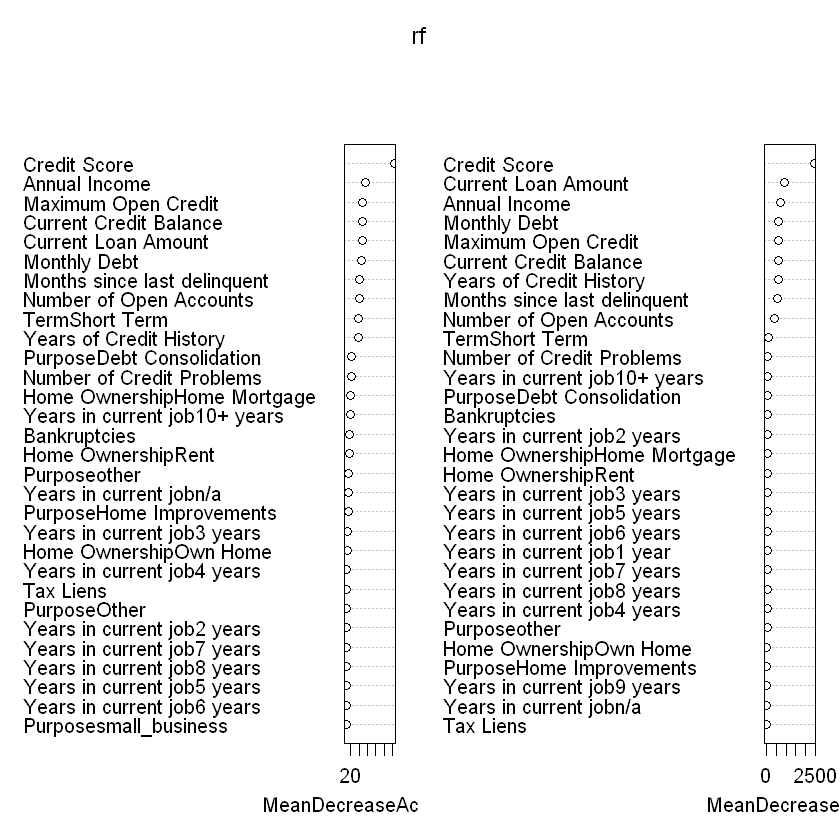

In [69]:
# importance(rf)  
varImpPlot(rf)

# Importance of features in the model, represented by degree of accuracy lost if the feature is removed.